In [27]:
import os.path as osp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from datetime import datetime
from datetime import timedelta

## All users

In [28]:
# Households --> Consumption Data (Power consumed by household)
# Grid --> Grid Data, (Power into, Power from) 
# solar --> Consumption Data (Power Consumed by household appliances, Power consumed immediately from solar panels)
base_solar = osp.join('useful_solar', 'run_household_solar_1')
grid = osp.join(base_solar, 'gridbalance2016.csv')
solar = osp.join(base_solar, 'power2016_solar_module.csv')
household = osp.join(base_solar, 'power2016Household.csv')
griddata = pd.read_csv(grid, index_col=0)
solardata = pd.read_csv(solar)
householddata = pd.read_csv(household)

In [29]:
# Read all folders and load the power consumption of all households into one frame
dfs = []
for p in glob.glob('useful_solar/*'):
    grid_balance = pd.read_csv(osp.join(p, 'gridbalance2016.csv'), usecols=[0, 3], index_col=0)
    solar_module = pd.read_csv(osp.join(p, 'power2016_solar_module.csv'), usecols=[0, 3], index_col=0)
    production = grid_balance['Power into grid'] + solar_module['Solar Power used']
    dfs.append(production.to_frame())

dfs = pd.concat(dfs, axis=1)
dfs.columns = ['production_h' + p.split('_')[-1] for p in glob.glob('useful_solar/*')]

In [30]:
dt = [datetime(2016, 1, 1)]
for _ in range(len(dfs)-1): 
    dt.append(dt[-1] + timedelta(seconds=60))

dfs['Date'] = dt
dfs.set_index('Date', drop=True, inplace=True)
dfs = dfs.resample('H').mean()

In [31]:
overall_production = dfs.sum(axis=1)
overall_production = overall_production.to_frame()
overall_production.columns = ['OverallProd']

## Combined

In [32]:
weather = pd.read_csv("Weather-AMS/Climate240.csv", skiprows=27)[:8784]
weather.columns = [c.split(' ')[0] for c in weather.columns]
weather.Local = dfs.index
weather.set_index('Local', inplace=True, drop=True)
weather = weather.drop(columns=['ID'])
weather = weather.astype(float)

In [62]:
cols = ['Irradiation', 'Wind', 'Rain', 'Diffuse', 'Direct']
# cols = ['Irradiation']
weather[cols]

,Irradiation,Wind,Rain,Diffuse,Direct
Local,,,,,
2016-01-01 00:00:00,0.000,5.528,0.065,0.000,0.000
2016-01-01 01:00:00,0.000,5.487,0.086,0.000,0.000
2016-01-01 02:00:00,0.000,5.659,0.103,0.000,0.000
2016-01-01 03:00:00,0.000,5.739,0.065,0.000,0.000
2016-01-01 04:00:00,0.000,5.553,0.058,0.000,0.000
2016-01-01 05:00:00,0.000,5.736,0.036,0.000,0.000
2016-01-01 06:00:00,0.000,5.615,0.042,0.000,0.000
2016-01-01 07:00:00,0.231,5.508,0.117,0.231,0.000
2016-01-01 08:00:00,12.601,5.475,0.110,12.281,0.321


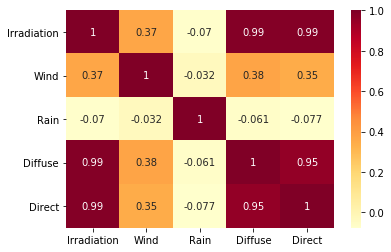

In [63]:
sns.heatmap(weather[cols].corr(), annot=True, cmap='YlOrRd')

In [64]:
fulldata = weather[cols]
fulldata['OverallProd'] = overall_production['OverallProd']
fulldata

/home/autarrsd/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Irradiation,Wind,Rain,Diffuse,Direct,OverallProd
Local,,,,,,
2016-01-01 00:00:00,0.000,5.528,0.065,0.000,0.000,0.000000
2016-01-01 01:00:00,0.000,5.487,0.086,0.000,0.000,0.000000
2016-01-01 02:00:00,0.000,5.659,0.103,0.000,0.000,0.000000
2016-01-01 03:00:00,0.000,5.739,0.065,0.000,0.000,0.000000
2016-01-01 04:00:00,0.000,5.553,0.058,0.000,0.000,0.000000
2016-01-01 05:00:00,0.000,5.736,0.036,0.000,0.000,0.000000
2016-01-01 06:00:00,0.000,5.615,0.042,0.000,0.000,0.000000
2016-01-01 07:00:00,0.231,5.508,0.117,0.231,0.000,0.000000
2016-01-01 08:00:00,12.601,5.475,0.110,12.281,0.321,0.000000


In [68]:
data = fulldata.values
X = data[:, :-1]
y = data[:, -1]

In [69]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

xtrain, xtest, ytrain, ytest = train_test_split(X, y, shuffle=False)
xgb = XGBRegressor(max_depth=25, n_estimators=500, n_jobs=8)

In [70]:
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=25,
             min_child_weight=1, missing=None, n_estimators=500, n_jobs=8,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)

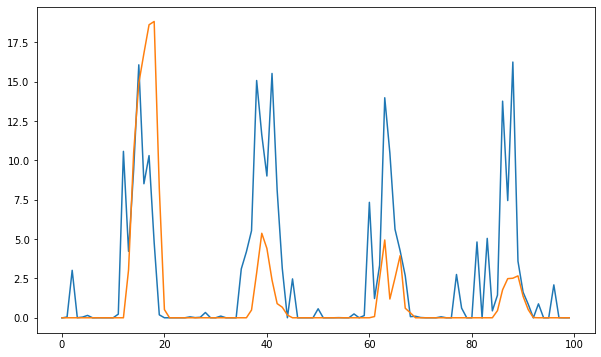

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
pred = xgb.predict(xtest)
plt.plot(pred[-100:])
plt.plot(ytest[-100:])
